## Experimento do Efeito Termiônico

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def exp(V_):
    e0 = 8.854*10**(-12)
    e = 1.602*10**(-19)
    m = 9.1*10**(-31)
    d = 1.8*10**(-2)
    return (4)* e0 * np.sqrt(2*e/m)*(V_**(3/2))/(9*(d**2))

In [21]:
def plot_Vi(V,I):
    fig, axs = plt.subplots(figsize = (10,6))

    Ifit = exp(V)


    axs.set_ylabel('I(A)',fontsize = 20)
    axs.set_xlabel('V(V)',fontsize = 20)


    axs.plot(V, I,'D-', markersize = 7, linewidth = 2, color = 'black', label = 'data')
    axs.plot(V, (1.2*10**(-2))**2*np.pi*Ifit, color = 'midnightblue', label ='fit')
    axs.legend(fontsize = 15)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    #axs.plot(np.arange(0,500,2), exp(np.arange(0,500,2)))
    axs.set_yscale('log')

### $T = 1892ºC$ $i_f = 2,815$ $V_f = 6,348$

In [4]:
V = [5,10.4,15.5,20.2,24.4,30,40.5,60.1,80.1,100.3,
     120.4,140.2,160.3,182.2,207.5,259.1,303.8,352.1,
     402.5,449,500.4,525.1]
I = [2,9,16,24,39,51,76,122,156,174,188,191,194,194,194,197,197,200,201,203,204,205]

V = np.array(V); I = 10**(-5)*np.array(I);

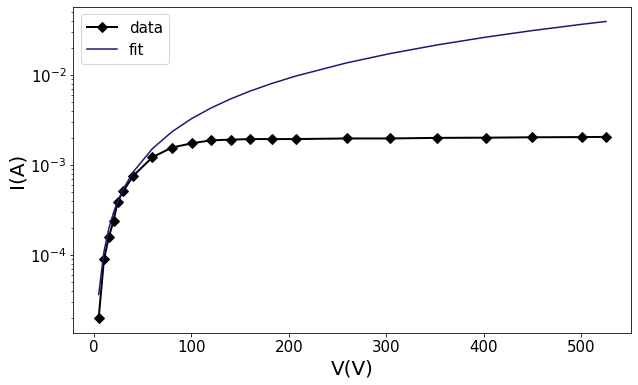

In [22]:
plot_Vi(V,I)

### $T = 2002ºC$ $i_f = 3,085$ $V_f = 7,251$

In [24]:
V = [5,12.1,21.5,25.2,30.8,35.3,40.1,45.3,52.1,59.8,65.7,71.2,80,90.1,100.2,110.3,121,139.7,
      160.2,180.8,199.8,220.5,240.5,259.6,280.6,299.6,350.8,400.2,452.1,499.8,519.8,552,558.6]
I = [3,13,32,41,56,70,85,103,127,159,182,204,239,282,328,370,412,489,559,617,665,700,726,744,
      759,768,782,791,803,810,812,816,817]

V = np.array(V); I = 10**(-5)*np.array(I);

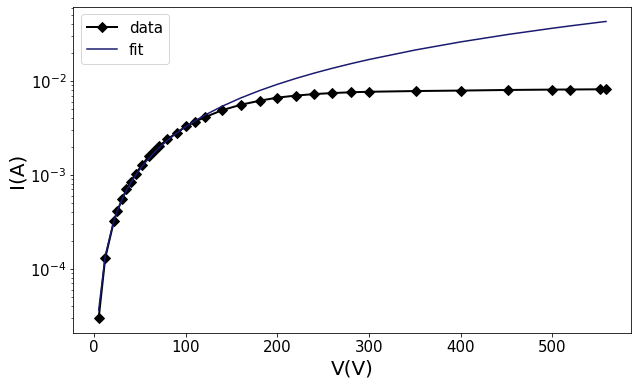

In [25]:
plot_Vi(V,I)

### $T = 1695ºC$ $i_f = 2,637$ $V_f = 4,953$

In [38]:
V = sorted([10.9,20,40.7,61.4,80.6,240,5.7,15.7,25,30,35])
I = sorted([4,7,9,10,10,11,1,6,8,9,9])

V = np.array(V); I = 10**(-5)*np.array(I);

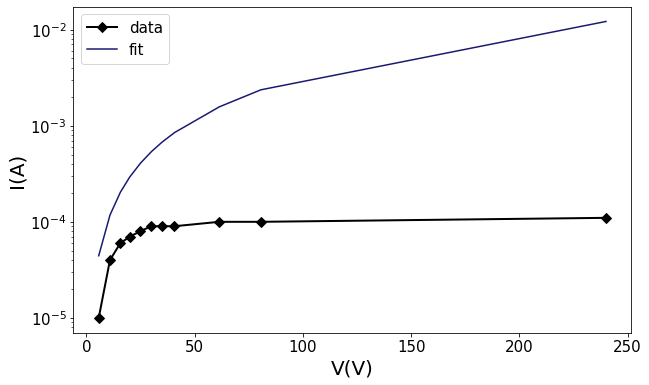

In [39]:
plot_Vi(V,I)

### $T = 1793ºC$ $i_f = 2,587$ $V_f = 5,621$

In [32]:
V = np.array([5,10.9,15.5,20.2,25.5,30.3,35,40,45,51.3,60.8,80.8,102.1,124.8,145.1,166.6,186.7,199,214,260,207.6,452.1,506.7])
I = np.array([3,11,17,19,26,31,36,39,41,42,45,46,47,47,48,48,48,48,49,50,50,51,51])

I = 10**(-5)*I;

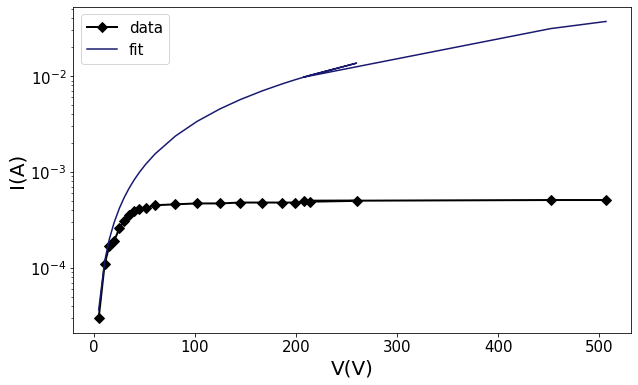

In [33]:
plot_Vi(V,I)

### $T = 1630ºC$ $i_f = 2,222A$ $V_f = 4,516V$

In [45]:
V = np.array([1.015,11.4,15.5,20.99,40.7,60.23,80,100,120.5,139.95,160.11,180.64,200,250,301,350,401,448,505.4])
I = np.array([0.1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

I = 10**(-5)*I;

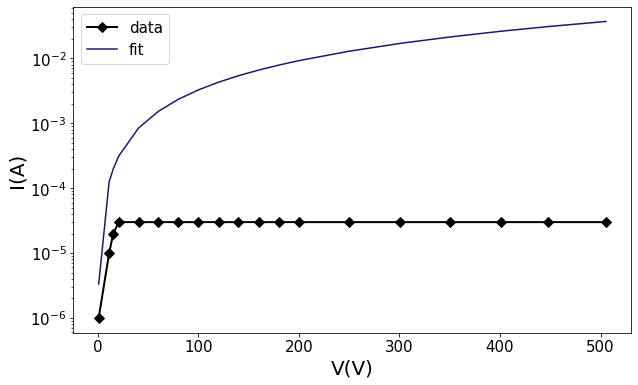

In [46]:
plot_Vi(V,I)

## Curva $I_{ca}\times I_{bh}$  

In [53]:
from sklearn.linear_model import LinearRegression

In [95]:
def B(I):
    N = 154
    R = 20*10**(-2)
    mi0 = 4*np.pi*10**(-7)
    return 0.716*mi0*N*I/R

In [212]:
def piece_wise(I_bh, I, n, I_corte,I_min,I_max):
    x1,y1 = I_bh[:n],I[:n]
    x2,y2 = I_bh[n:],I[n:] 

    reg1 = LinearRegression().fit(x1.reshape(-1,1), y1)
    reg2 = LinearRegression().fit(x2.reshape(-1,1), y2)

    x1int = np.linspace(x1[0],x1[-1]+0.25,10)
    x2int = np.linspace(x2[0]-0.25,x2[-1],10)

    f1 = reg1.coef_*x1int + reg1.intercept_
    f2 = reg2.coef_*x2int + reg2.intercept_

    fig,axs = plt.subplots(figsize = (10,6))

    axs.plot(I_bh, I, 'D-', label='data', color = 'blue')
    axs.plot(x1int, f1, label='f',linewidth = 3, color = 'gray')
    axs.plot(x2int, f2, linewidth = 3, color = 'gray')
    
    axs.vlines(I_corte, I_min, I_max,linestyle = '--',linewidth = 3,color = 'black', label = r'$I_{corte} = $'+str(I_corte))
    plt.ylim(I_min,I_max + .02)
    axs.set_xlabel(r'$I_{bh}(A)$', fontsize = 20)
    axs.set_ylabel(r'$I_{ca}(mA)$', fontsize = 20)

    axs.legend(fontsize = 15)
    axs.grid(True)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()


### V = 50 e T = 1851

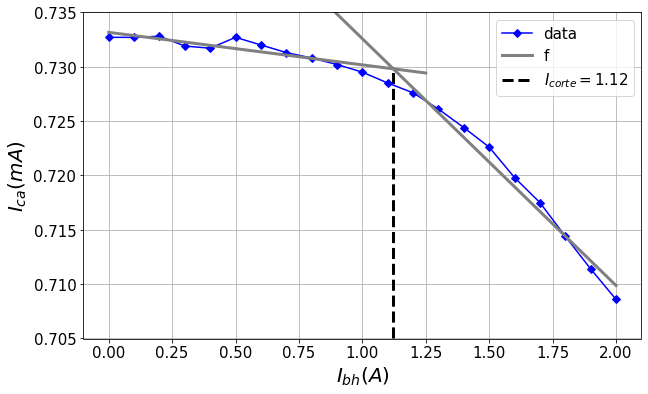

In [191]:
# V = 50 e T = 1851
I_bh = np.linspace(0,2,21)
I = np.array([0.7327,0.7327,0.7328,0.7319,0.7317,
                 0.7327,0.7320,0.7313,0.7308,0.7302,
                 0.7295,0.7285,0.7276,0.7261,0.7244,
                 0.7226,0.7198,0.7175,0.7144,0.7114,
                 0.7086])

n = 11
I_corte = 1.12
piece_wise(I_bh,I,n,I_corte,I_min = 0.705, I_max = 0.730)

In [167]:
I_corte = 1.12
V = 50
T = 1851
em = 2*V/((B(I_corte)*0.03)**2)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte)
print('e/m = ', em)

T =  1851
V =  50
I_corte =  1.12
e/m =  184541574731.3468


### V = 69.1 T = 1810

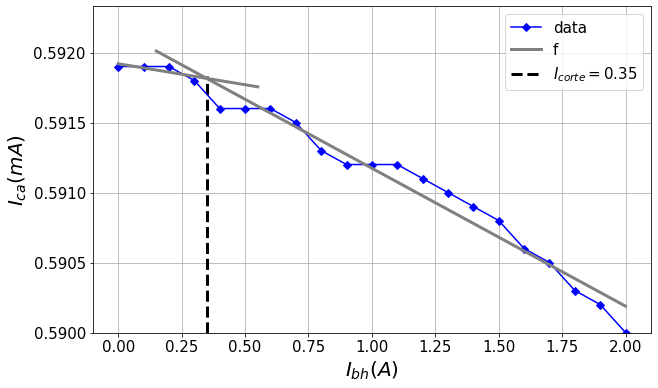

In [200]:
# V = 69.1 T = 1810

I_bh = np.linspace(0,2,21)
I = np.array([0.5919,0.5919,0.5919,0.5918,0.5916,
                 0.5916,0.5916,0.5915,0.5913,0.5912,
                 0.5912,0.5912,0.5911,0.5910,0.5909,
                 0.5908,0.5906,0.5905,0.5903,0.5902,
                 0.5900])


n = 4
I_corte = 0.35
piece_wise(I_bh,I,n, I_corte, I_min = 0.590, I_max = 0.59183)

In [131]:
I_corte = 0.4
V = 69.1
T = 1810
em = 2*V/((B(I_corte)*0.03)**2)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte)
print('e/m = ', em)

T =  1810
V =  69.1
I_corte =  0.4
e/m =  1999485817225.1755


### V = 53.3 e T = 1900 ºC

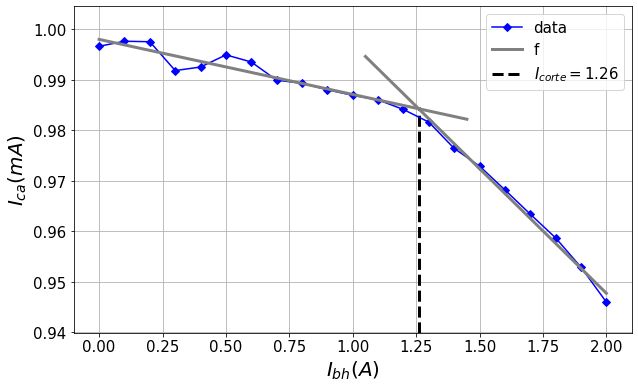

In [217]:
# V = 53.3 e T = 1900 ºC

I_bh = np.linspace(0,2,21)
I = np.array([0.9966,0.9976,0.9975,0.9918,0.9925,
                0.9949,0.9935,0.9899,0.9893,0.9880,
                0.9869,0.9860,0.9841,0.9816,0.9764,
                0.9729,0.9682,0.9634,0.9587,0.9529,
                0.9460])


n = 13
I_corte = 1.26
piece_wise(I_bh,I,n,I_corte, I_min = 0.94, I_max = 0.9845)

In [218]:
I_corte = 1.26
V = 53.3
T = 1810
em = 2*V/((B(I_corte)*0.03)**2)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte)
print('e/m = ', em)

T =  1810
V =  53.3
I_corte =  1.26
e/m =  155434128326.8075
